<center><h1><b>5주차 ✅ 폐기물 환경오염 데이터 분석 : 토양오염</b></h1></center>


---
----

<center><h2><b>데이터 초기 전처리</b></h2></center>


In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 30)

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin":
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum - qq > /dev/null
        !fc-cache - fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family


# style 설정은 꼭 폰트설정 위에서 합니다.
# style 에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 한글이 깨집니다.
plt.style.use("seaborn")
# 폰트설정
plt.rc("font", family=get_font_family())

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'


In [19]:
raw_19 = pd.read_csv('data/soil/soil_19.csv')
raw_19 = raw_19.rename(columns={'variable': '항목', '토양분석항목': 'value'})
raw_19.head()

,년도,조사지역종류,지점명칭,시도,시료깊이(m),항목,value
0,2019,산업단지 및 공장지역,알파색채(주),서울특별시,0~1,Cd,0.87
1,2019,산업단지 및 공장지역,평화당인쇄(주),서울특별시,1-2,Cd,0.00
2,2019,폐기물 처리 및 재활용 관련 지역,인선사,서울특별시,0~3,Cd,0.10
3,2019,원광석·고철 등의 보관·사용지역,중앙자원,서울특별시,0.15,Cd,0.96
4,2019,폐기물 처리 및 재활용 관련 지역,중앙자원,서울특별시,0-1.5,Cd,1.59


In [18]:
raw_20 = pd.read_csv('data/soil/soil_20.csv')
raw_20 = raw_20.rename(columns={'variable': '항목', '토양분석항목': 'value'})
raw_20.head()

,년도,조사지역종류,지점명칭,시도,시료깊이(m),항목,value
0,2020,폐기물 처리 및 재활용 관련 지역,서울자원,서울특별시,2~3,Cd,0.94
1,2020,교통관련시설지역,101경비단,서울특별시,2~3,Cd,1.88
2,2020,교통관련시설지역,삼성손세차장,서울특별시,2~3,Cd,0.57
3,2020,교통관련시설지역,감사원,서울특별시,2~3,Cd,0.14
4,2020,교통관련시설지역,와룡운수(주),서울특별시,3~4,Cd,0.20


In [20]:
raw_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78729 entries, 0 to 78728
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   년도       78729 non-null  int64 
 1   조사지역종류   78729 non-null  object
 2   지점명칭     78729 non-null  object
 3   시도       78729 non-null  object
 4   시료깊이(m)  78729 non-null  object
 5   항목       78729 non-null  object
 6   value    78729 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.2+ MB


In [54]:
raw_19['value'] = pd.to_numeric(raw_19['value'], errors='coerce', downcast='float')
raw_20['value'] = pd.to_numeric(raw_20['value'], errors='coerce', downcast='float')
raw_20.dtypes

년도           int64
조사지역종류      object
지점명칭        object
시도          object
시료깊이(m)     object
항목          object
value      float32
dtype: object

In [51]:
raw_19['항목'].unique()
raw_20['항목'].unique()

array(['Cd', 'Cu', 'As', 'Hg', 'Pb', 'Cr6+', 'Zn', 'Ni', 'F', '유기인',
       'PCB', 'CN', '페놀', '벤젠', '톨루엔', '에틸벤젠', '크실렌', 'TPH', 'TCE', 'PCE',
       '벤조(a)피렌', '1,2-디클로로에탄', 'pH'], dtype=object)

In [31]:
cols = ['Cd', 'Cu', 'As', 'Hg', 'Pb', 'Cr6+', 'Zn', 'Ni', 'pH']
cols

['Cd', 'Cu', 'As', 'Hg', 'Pb', 'Cr6+', 'Zn', 'Ni', 'pH']

In [78]:
raw_19 = raw_19[raw_19['항목'].isin(cols)]
raw_20 = raw_20[raw_20['항목'].isin(cols)]
raw_20.head()

,년도,조사지역종류,지점명칭,시도,시료깊이(m),항목,value
0,2020,폐기물 처리 및 재활용 관련 지역,서울자원,서울특별시,2~3,Cd,0.94
1,2020,교통관련시설지역,101경비단,서울특별시,2~3,Cd,1.88
2,2020,교통관련시설지역,삼성손세차장,서울특별시,2~3,Cd,0.57
3,2020,교통관련시설지역,감사원,서울특별시,2~3,Cd,0.14
4,2020,교통관련시설지역,와룡운수(주),서울특별시,3~4,Cd,0.20


array([[<AxesSubplot:title={'center':'년도'}>,
        <AxesSubplot:title={'center':'value'}>]], dtype=object)

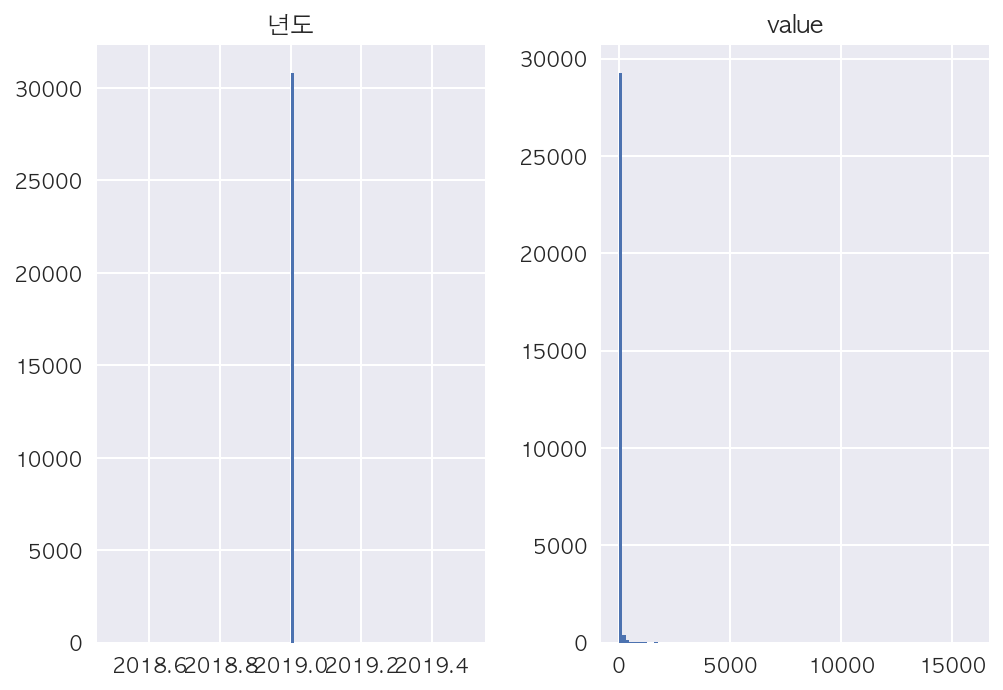

In [79]:
raw_19.hist(bins=100)

In [80]:
raw_19.describe()

,년도,value
count,30807.0,29915.000000
mean,2019.0,25.993587
std,0.0,151.879395
min,2019.0,0.000000
25%,2019.0,0.040000
50%,2019.0,6.600000
75%,2019.0,20.100000
max,2019.0,15868.200195


In [81]:
raw_20.describe()

,년도,value
count,31410.0,30834.000000
mean,2020.0,28.528990
std,0.0,353.598511
min,2020.0,0.000000
25%,2020.0,0.070000
50%,2020.0,6.900000
75%,2020.0,21.000000
max,2020.0,40265.199219


In [92]:
raw_19_ = raw_19.drop(columns=['조사지역종류', '지점명칭',])
raw_20_ = raw_20.drop(columns=['조사지역종류', '지점명칭',])
raw_20_

,년도,시도,시료깊이(m),항목,value
0,2020,서울특별시,2~3,Cd,0.94
1,2020,서울특별시,2~3,Cd,1.88
2,2020,서울특별시,2~3,Cd,0.57
3,2020,서울특별시,2~3,Cd,0.14
4,2020,서울특별시,3~4,Cd,0.20
...,...,...,...,...,...
80265,2020,제주특별자치도,중토,pH,6.50
80266,2020,제주특별자치도,표토,pH,6.70
80267,2020,제주특별자치도,중토,pH,6.70
80268,2020,제주특별자치도,표토,pH,6.90


In [93]:
raw_19_g = raw_19_.groupby(by=['시도', '항목']).mean() 
raw_19_ = raw_19_g.drop(columns='년도')
raw_19_ = raw_19_.rename(columns={'value':'19년_토양오염'})
raw_19_


19년_토양오염
시도   항목             
강원도  As     7.012837
     Cd     0.112558
     Cr6+   0.035349
     Cu    19.508837
     Hg     0.026279
...              ...
충청북도 Hg     0.008323
     Ni    12.916774
     Pb    20.951612
     Zn    83.589676
     pH     6.712258

[153 rows x 1 columns]

In [94]:
raw_20_g = raw_20_.groupby(by=['시도', '항목']).mean() 
raw_20_ = raw_20_g.drop(columns='년도')
raw_20_ = raw_20_.rename(columns={'value':'20년_토양오염'})
raw_20_


20년_토양오염
시도   항목             
강원도  As     2.878578
     Cd     0.070000
     Cr6+   0.009333
     Cu    78.711555
     Hg     0.035289
...              ...
충청북도 Hg     0.001895
     Ni    14.014380
     Pb    18.920261
     Zn    87.864708
     pH     7.088889

[153 rows x 1 columns]

In [106]:
soil_1920_ = soil_1920_.reset_index().rename(columns={'시도': '시도명'})
soil_1920_

,시도명,항목,19년_토양오염,20년_토양오염
0,강원도,As,7.012837,2.878578
1,강원도,Cd,0.112558,0.070000
2,강원도,Cr6+,0.035349,0.009333
3,강원도,Cu,19.508837,78.711555
4,강원도,Hg,0.026279,0.035289
...,...,...,...,...
148,충청북도,Hg,0.008323,0.001895
149,충청북도,Ni,12.916774,14.014380
150,충청북도,Pb,20.951612,18.920261
151,충청북도,Zn,83.589676,87.864708


In [108]:
# soil_1920_ = pd.merge(raw_19_, raw_20_, left_index=True, right_index=True)
soil_1920_.to_csv('output/soil/soil_1920.csv', index=False)

#### 19년도 mean, median, max, min

In [44]:
soil_19_mean = raw_19.groupby(by=['시도', '항목']).mean()
soil_19_mean = soil_19_mean.drop(columns=['년도'])
soil_19_mean = soil_19_mean.rename(columns={'value': '19년도_평균'})
soil_19_mean


19년도_평균
시도   항목             
강원도  As     7.012837
     Cd     0.112558
     Cr6+   0.035349
     Cu    19.508837
     Hg     0.026279
...              ...
충청북도 Hg     0.008323
     Ni    12.916774
     Pb    20.951612
     Zn    83.589676
     pH     6.712258

[153 rows x 1 columns]

In [45]:
soil_19_median = raw_19.groupby(by=['시도', '항목']).median()
soil_19_median = soil_19_median.drop(columns=['년도'])
soil_19_median = soil_19_median.rename(columns={'value': '19년도_중앙치'})
soil_19_median


19년도_중앙치
시도   항목             
강원도  As     4.410000
     Cd     0.000000
     Cr6+   0.000000
     Cu    14.400000
     Hg     0.010000
...              ...
충청북도 Hg     0.000000
     Ni     8.100000
     Pb    17.200001
     Zn    78.599998
     pH     6.800000

[153 rows x 1 columns]

In [47]:
soil_19_max = raw_19.groupby(by=['시도', '항목']).max()
soil_19_max = soil_19_max.drop(columns=['년도', '조사지역종류', '지점명칭', '시료깊이(m)'])
soil_19_max = soil_19_max.rename(columns={'value': '19년도_최댓값'})
soil_19_max


19년도_최댓값
시도   항목              
강원도  As     88.750000
     Cd      3.750000
     Cr6+    1.000000
     Cu    328.299988
     Hg      0.210000
...               ...
충청북도 Hg      0.200000
     Ni     72.400002
     Pb    174.300003
     Zn    205.100006
     pH      9.300000

[153 rows x 1 columns]

In [49]:
soil_19_min = raw_19.groupby(by=['시도', '항목']).min()
soil_19_min = soil_19_min.drop(columns=['년도', '조사지역종류', '지점명칭', '시료깊이(m)'])
soil_19_min = soil_19_min.rename(columns={'value': '19년도_최솟값'})
soil_19_min


19년도_최솟값
시도   항목             
강원도  As     0.000000
     Cd     0.000000
     Cr6+   0.000000
     Cu     0.000000
     Hg     0.000000
...              ...
충청북도 Hg     0.000000
     Ni     0.800000
     Pb     4.600000
     Zn    27.299999
     pH     4.000000

[153 rows x 1 columns]

In [50]:
soil_19 = pd.merge(soil_19_mean, soil_19_median, left_index=True, right_index=True)
soil_19 = pd.merge(soil_19, soil_19_max, left_index=True, right_index=True)
soil_19 = pd.merge(soil_19, soil_19_min, left_index=True, right_index=True)
soil_19

19년도_평균   19년도_중앙치    19년도_최댓값   19년도_최솟값
시도   항목                                               
강원도  As     7.012837   4.410000   88.750000   0.000000
     Cd     0.112558   0.000000    3.750000   0.000000
     Cr6+   0.035349   0.000000    1.000000   0.000000
     Cu    19.508837  14.400000  328.299988   0.000000
     Hg     0.026279   0.010000    0.210000   0.000000
...              ...        ...         ...        ...
충청북도 Hg     0.008323   0.000000    0.200000   0.000000
     Ni    12.916774   8.100000   72.400002   0.800000
     Pb    20.951612  17.200001  174.300003   4.600000
     Zn    83.589676  78.599998  205.100006  27.299999
     pH     6.712258   6.800000    9.300000   4.000000

[153 rows x 4 columns]

#### 20년도 mean, median, max, min

In [57]:
soil_20_mean = raw_20.groupby(by=['시도', '항목']).mean()
soil_20_mean = soil_20_mean.drop(columns=['년도'])
soil_20_mean = soil_20_mean.rename(columns={'value': '20년도_평균'})
soil_20_mean


20년도_평균
시도   항목             
강원도  As     2.878578
     Cd     0.070000
     Cr6+   0.009333
     Cu    78.711555
     Hg     0.035289
...              ...
충청북도 Hg     0.001895
     Ni    14.014380
     Pb    18.920261
     Zn    87.864708
     pH     7.088889

[153 rows x 1 columns]

In [58]:
soil_20_median = raw_20.groupby(by=['시도', '항목']).median()
soil_20_median = soil_20_median.drop(columns=['년도'])
soil_20_median = soil_20_median.rename(columns={'value': '20년도_중앙치'})
soil_20_median


20년도_중앙치
시도   항목            
강원도  As        1.56
     Cd        0.00
     Cr6+      0.00
     Cu       17.00
     Hg        0.02
...             ...
충청북도 Hg        0.00
     Ni        9.50
     Pb       17.00
     Zn       77.00
     pH        7.20

[153 rows x 1 columns]

In [59]:
soil_20_max = raw_20.groupby(by=['시도', '항목']).max()
soil_20_max = soil_20_max.drop(columns=['년도', '조사지역종류', '지점명칭', '시료깊이(m)'])
soil_20_max = soil_20_max.rename(columns={'value': '20년도_최댓값'})
soil_20_max


20년도_최댓값
시도   항목                
강원도  As       45.700001
     Cd        1.350000
     Cr6+      2.100000
     Cu    11037.500000
     Hg        0.550000
...                 ...
충청북도 Hg        0.180000
     Ni       57.700001
     Pb      106.900002
     Zn      333.700012
     pH        8.700000

[153 rows x 1 columns]

In [60]:
soil_20_min = raw_20.groupby(by=['시도', '항목']).min()
soil_20_min = soil_20_min.drop(columns=['년도', '조사지역종류', '지점명칭', '시료깊이(m)'])
soil_20_min = soil_20_min.rename(columns={'value': '20년도_최솟값'})
soil_20_min


20년도_최솟값
시도   항목             
강원도  As     0.000000
     Cd     0.000000
     Cr6+   0.000000
     Cu     1.600000
     Hg     0.000000
...              ...
충청북도 Hg     0.000000
     Ni     1.400000
     Pb     4.600000
     Zn    37.299999
     pH     4.400000

[153 rows x 1 columns]

In [61]:
soil_20 = pd.merge(soil_20_mean, soil_20_median, left_index=True, right_index=True)
soil_20 = pd.merge(soil_20, soil_20_max, left_index=True, right_index=True)
soil_20 = pd.merge(soil_20, soil_20_min, left_index=True, right_index=True)
soil_20

20년도_평균  20년도_중앙치      20년도_최댓값   20년도_최솟값
시도   항목                                                
강원도  As     2.878578      1.56     45.700001   0.000000
     Cd     0.070000      0.00      1.350000   0.000000
     Cr6+   0.009333      0.00      2.100000   0.000000
     Cu    78.711555     17.00  11037.500000   1.600000
     Hg     0.035289      0.02      0.550000   0.000000
...              ...       ...           ...        ...
충청북도 Hg     0.001895      0.00      0.180000   0.000000
     Ni    14.014380      9.50     57.700001   1.400000
     Pb    18.920261     17.00    106.900002   4.600000
     Zn    87.864708     77.00    333.700012  37.299999
     pH     7.088889      7.20      8.700000   4.400000

[153 rows x 4 columns]

In [100]:
soil_1920 = pd.merge(soil_19, soil_20, left_index=True, right_index=True, )
soil_1920.to_csv('output/soil/soil_stat_1920.csv')